<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#散点图" data-toc-modified-id="散点图-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>散点图</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [3]:
# 解决中文显示的问题
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

![figure](pics\anatomy.webp)

#### 散点图

In [13]:
midwest = pd.read_csv("datasets\midwest_filter.csv")
midwest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 29 columns):
PID                     332 non-null int64
county                  332 non-null object
state                   332 non-null object
area                    332 non-null float64
poptotal                332 non-null int64
popdensity              332 non-null float64
popwhite                332 non-null int64
popblack                332 non-null int64
popamerindian           332 non-null int64
popasian                332 non-null int64
popother                332 non-null int64
percwhite               332 non-null float64
percblack               332 non-null float64
percamerindan           332 non-null float64
percasian               332 non-null float64
percother               332 non-null float64
popadults               332 non-null int64
perchsd                 332 non-null float64
percollege              332 non-null float64
percprof                332 non-null float64
poppovertykno

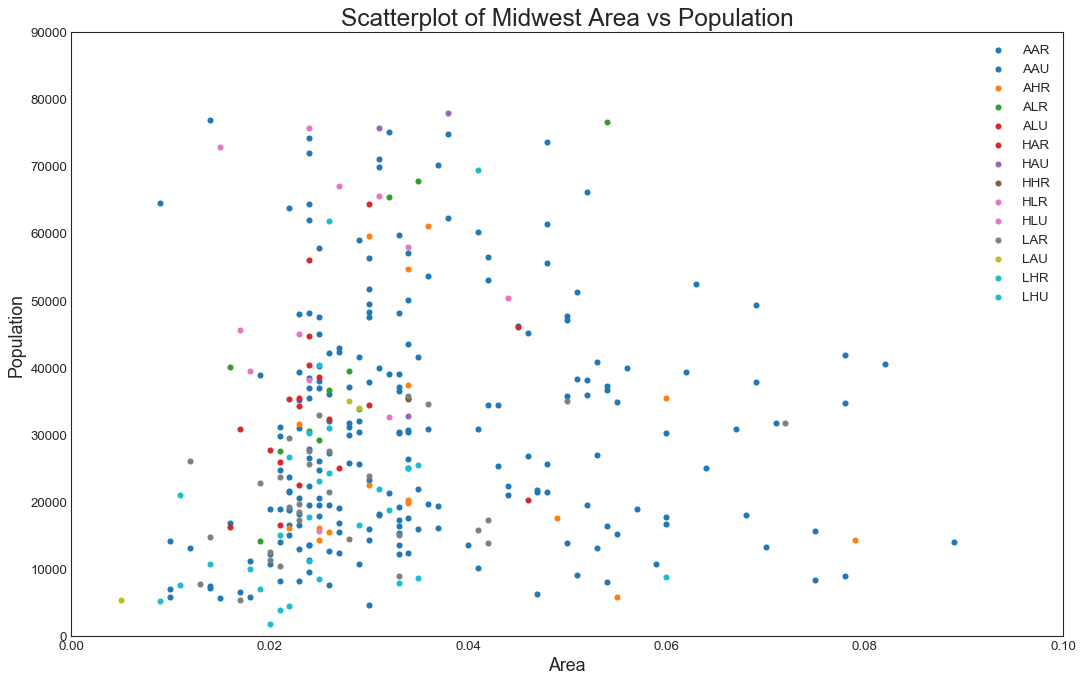

In [24]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# 为每个类别创建一种颜色，最新版本中颜色的参数应该是一个 2-D array in which the rows are RGB or RGBA，
# 这里使用引入 matplotlib_axes_logger.setLevel('ERROR') 来解决提示显示的问题
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# 创建一个画布，制定大小、分辨率、底色和边沿颜色
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')


for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)       

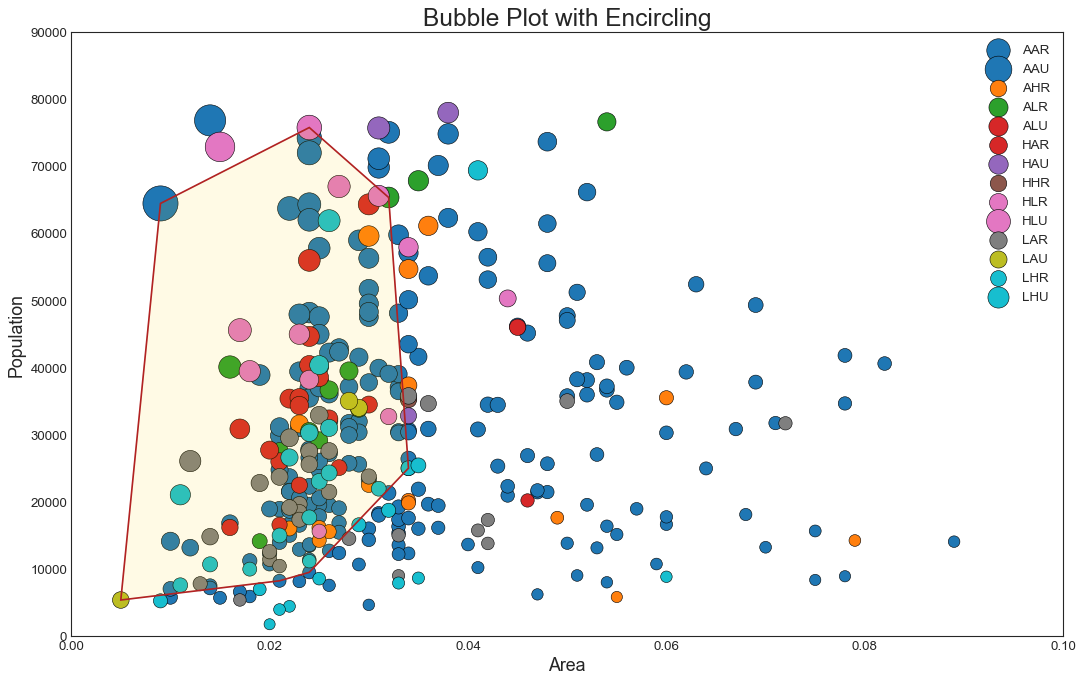

In [26]:
from matplotlib import patches
from scipy.spatial import ConvexHull

fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', c=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

参考：[Top 50 matplotlib Visualizations – The Master Plots (with full python code)](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python)